# 최근린 분석(가장 집적된 곳)

In [1]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import geojson as gj
from tqdm import tqdm
import pickle
from shapely.geometry import Polygon
from shapely.geometry import Point
import shapely.speedups
import sys
shapely.speedups.enable()

import warnings
warnings.filterwarnings(action='ignore')

import json
import networkx as nx
from multiprocessing import Process
from pandas import ExcelWriter
import pydeck as pdk
from folium import FeatureGroup, LayerControl
import random
import plotly.express as px
import plotly
import plotly.graph_objects as go
import libpysal as lps
import esda
import pysal as ps
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import mapclassify as mc
import matplotlib.pyplot as plt
#import pysal.viz.mapclassify as mc
from matplotlib.colors import rgb2hex
from matplotlib.colors import ListedColormap
import matplotlib

In [3]:
# 데이터
df=gpd.read_file("테스트.geojson",driver="GeoJSON")
df.reset_index()
df.fillna(0, inplace=True)
df

,gid,상업지역면적,공업지역면적,주거지역면적,녹지지역면적,여성안심택배함_격자별개수,편의점_격자별개수,공원_격자별개수,안전비상벨_격자별개수,노숙인자활시설_격자별개수,...,공동주거건축물비율,사고다발지역,경찰서_Buffer면적,치안센터_Buffer면적,보안등_Buffer면적,가로등_Buffer면적,CCTV_Buffer면적,유흥업소_Buffer면적,rep_cnt,geometry
0,다사49aa19ab,0.0,0.0,0.0,1.533091e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ..."
1,다사49aa19ba,0.0,0.0,0.0,2.217984e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ..."
2,다사49aa20aa,0.0,0.0,0.0,1.536883e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ..."
3,다사49ab18ab,0.0,0.0,0.0,6.017091e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ..."
4,다사49ab18ba,0.0,0.0,0.0,3.456896e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,0.0,0.0,0.0,1.206657e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ..."
2086,다사63ba21ab,0.0,0.0,0.0,9.069994e-08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ..."
2087,다사63ba21ba,0.0,0.0,0.0,7.868796e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ..."
2088,다사63ba21bb,0.0,0.0,0.0,2.346309e-06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.374772e-08,0.0,0.0,0,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ..."


2.3. 핫스팟 분석

- local moran's I 통계방법을 사용하여 핫스팟 분석

- grid 별 rep_cnt hotpost 탐지 

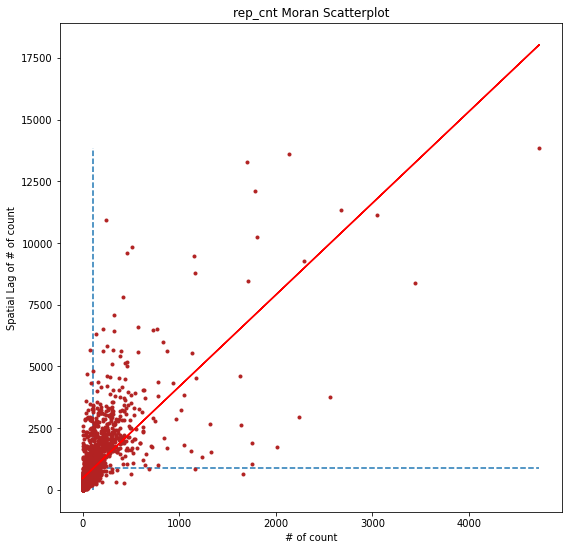

In [4]:
# grid 별 rep_cnt에 대한 moran scatter plot - df 값마다 시행(지도, 모란 시각화)
wq =  lps.weights.Queen.from_dataframe(df)
c = df['rep_cnt']
c_lag = lps.weights.lag_spatial(wq, c)
clagq5 = mc.Quantiles(c_lag, k=5)
b, a = np.polyfit(c, c_lag, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(c, c_lag, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(c.mean(), c_lag.min(), c_lag.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(c_lag.mean(), c.min(), c.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(c, a + b*c, 'r')
plt.title('rep_cnt Moran Scatterplot')
plt.ylabel('Spatial Lag of # of count')
plt.xlabel('# of count')
#plt.savefig(os.path.join(result_path, 'rep_cnt Moran.png'))
plt.show()


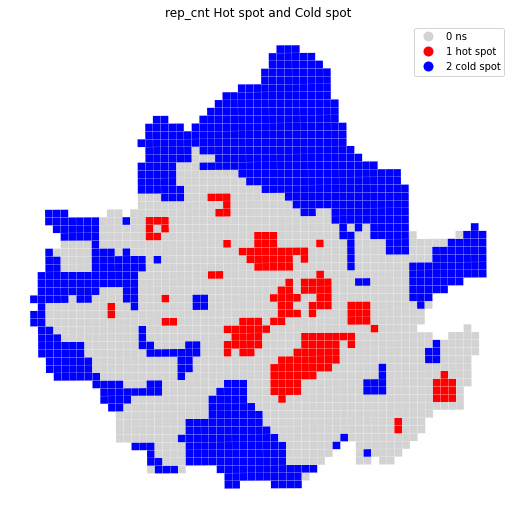

In [5]:
# 통계적 유의한 지역 추출
li = esda.Moran_Local(c, wq)
sig = 1 * (li.p_sim < 0.05)
# hotspot , coldspot 추출
hotspot = 1 * (sig * li.q==1) # H-H
coldspot = 2 * (sig * li.q==3) # L-L

spots = hotspot + coldspot 
spot_labels = [ '0 ns', '1 hot spot', '2 cold spot']
labels = [spot_labels[i] for i in spots]

df['rep_cnt hot_spot'] = spots

# hotspot을 빨강색, coldspot 파랑색으로 단계구분도 plot

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'blue'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True,         k=2, cmap=hmap, linewidth=0.1, ax=ax,         edgecolor='white', legend=True)
ax.set_axis_off()
plt.title('rep_cnt Hot spot and Cold spot')
plt.show()


## 최근린 (Average Nearest Neighbor) 분석

- grid 별 최근접 이웃과의 거리의 평균 분석을 통해 경쟁을 정량화해서 확인
- 위경도가 있는(geometry가 point 형) 데이터들 전부 사용 가능

In [6]:
!pip install pointpats
from pointpats.distance_statistics import G, F, J, K, L, Genv, Fenv, Jenv, Kenv, Lenv
from pointpats import PointPattern, PoissonPointProcess, as_window

In [24]:
others_alcohol = gpd.read_file('8.4개시도_유흥업소현황.geojson')
#others_alcohol = gpd.read_file('21.수원시_가로등현황.csv')
if others_alcohol.loc[0,'geometry']==None:
    others_alcohol[['lat','lon']]=others_alcohol[['lat','lon']].astype(float)
    for i in range(len(others_alcohol)):
        others_alcohol.loc[i,'geometry']=Point(others_alcohol.loc[0,'lon'], others_alcohol.loc[i,'lat'])
    others_alcohol = others_alcohol.set_crs(4326)
others_alcohol.rename(columns={'lat':'LAT', 'lon':'LON'}, inplace=True)
others_alcohol

,STORE_ID,BUSINESS_NM,STORE_NM,COM_LC_CD,COM_LC_NM,COM_MC_CD,COM_MC_NM,COM_SC_CD,COM_SC_NM,KSIC_CD,...,BLDG_NM,ROAD_ADDR,OLD_ZIP_CODE,ZIP_CODE,DONG,FLOOR,HO,LON,LAT,geometry
0,20928658,채플린노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 권선구 삼천병마로1598번길 12,441849,16635,None,1,None,126.964289,37.245329,POINT (126.96429 37.24533)
1,25447952,워커힐노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 장안구 팔달로271번길 36,440818,16269,None,1,None,127.013671,37.290940,POINT (127.01367 37.29094)
2,25393963,왈츠노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,이천빌딩,경기도 수원시 팔달구 효원로291번길 28,442835,16488,None,2,None,127.034312,37.262510,POINT (127.03431 37.26251)
3,20799982,락휴,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 영통구 아주로 18,443821,16502,None,4,4,127.044126,37.276376,POINT (127.04413 37.27638)
4,20846573,현대노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 권선구 구운로 29,441819,16410,None,-1,None,126.974839,37.276931,POINT (126.97484 37.27693)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,24311781,오케이노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,연무건재,경기도 수원시 장안구 연무로42번길 36,440811,16216,None,None,None,127.027992,37.296348,POINT (127.02799 37.29635)
4249,24345501,별빛노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 권선구 권선로640번길 12,441821,16564,None,-1,None,127.020837,37.260137,POINT (127.02084 37.26014)
4250,24578950,인연노래연습장,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,세류역사,경기도 수원시 권선구 정조로 393-1,441430,16659,2,None,None,127.013970,37.244644,POINT (127.01397 37.24464)
4251,24922026,일번가노래방,None,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,...,None,경기도 수원시 장안구 금당로 17,440200,16283,None,None,None,127.014043,37.304775,POINT (127.01404 37.30477)


In [25]:
# data_alcohol의 좌표계를 UTM-K로 변환
data_alcohol = others_alcohol.to_crs(epsg = 5179)
data_alcohol = data_alcohol.to_crs(epsg = 5179)

# 각 상점 별 최근접 이웃간의 거리 구하기(nearest neighborhodd distance: NND)
pp = PointPattern([(j.x,j.y) for j in data_alcohol['geometry']])

data_alcohol['nnd'] = pp.nnd
data_alcohol = data_alcohol.to_crs(epsg = 4326)

# 각 상점이 어느 grid에 속한지 확인
gid = []
for i in tqdm(range(len(data_alcohol))):
    if any(df['geometry'].contains(data_alcohol.iloc[i]['geometry'])):
        gid.append(df[df['geometry'].contains(data_alcohol.iloc[i]['geometry'])]['gid'].values[0])
    else:
        gid.append('Null')

data_alcohol['gid'] = gid

100%|██████████| 4253/4253 [00:12<00:00, 354.18it/s]


In [26]:
# 각 grid 별 평균 nnd 구하기
gid_list = set(data_alcohol['gid'])
mean_nnd = 0 
d= dict()
for i in gid_list:
    temp = data_alcohol[data_alcohol['gid']==i]
    mean_nnd = temp['nnd'].sum()/len(temp)
    d[i] = mean_nnd
    print(i,': 평균 nn 거리', mean_nnd)

다사58ab22ab : 평균 nn 거리 171.76348701211734
다사53aa22ab : 평균 nn 거리 42.01531774437634
다사58aa20ba : 평균 nn 거리 83.18512625998825
다사55ba23ba : 평균 nn 거리 386.8732322442836
다사50ab21ba : 평균 nn 거리 248.1660303527305
다사56ba22ba : 평균 nn 거리 256.9101768300239
다사53ba19bb : 평균 nn 거리 33.305670624981
다사59ba18ab : 평균 nn 거리 24.342429081414334
다사59ab22aa : 평균 nn 거리 33.92999273752405
다사50ba21ba : 평균 nn 거리 248.1660303527305
다사57aa19ba : 평균 nn 거리 68.10365463433787
다사62ab17aa : 평균 nn 거리 44.46553518806168
다사52bb22aa : 평균 nn 거리 45.67486096674435
다사53bb20aa : 평균 nn 거리 146.6135526340394
다사57bb19bb : 평균 nn 거리 191.63556441137243
다사56bb21ba : 평균 nn 거리 26.859864597909567
다사56bb18bb : 평균 nn 거리 378.9130119230005
다사56ba18bb : 평균 nn 거리 259.73395826614706
다사56ab17bb : 평균 nn 거리 114.08378224324667
다사57ba18bb : 평균 nn 거리 92.32305222090335
다사55bb20aa : 평균 nn 거리 66.46541367143557
다사59aa18bb : 평균 nn 거리 362.522956180369
다사57aa20ab : 평균 nn 거리 214.03330874967452
다사55ab23aa : 평균 nn 거리 57.293083825369536
다사53ba20aa : 평균 nn 거리 146.613552634

 * ANN 값이 작을 수록 경쟁이 치열하다는 뜻이다
 * ANN 값을 역수로 취해줌으로서 경쟁이 치열한 정도를 눈으로 비교할 수 있음

In [27]:
# grid 별 ANN 역수 취하기
for i in data_alcohol['gid']:
    if i in d.keys():
        data_alcohol.loc[data_alcohol[data_alcohol['gid']==i].index,['평균 nnd 역수']] = 1/(d[i]+1)
    else:
        data_alcohol.loc[data_alcohol[data_alcohol['gid']==i].index,['평균 nnd 역수']]  = 0

Text(0.5, 1.0, 'Inverse of Average nearest neighbor distance (Head-Tail breaks)')

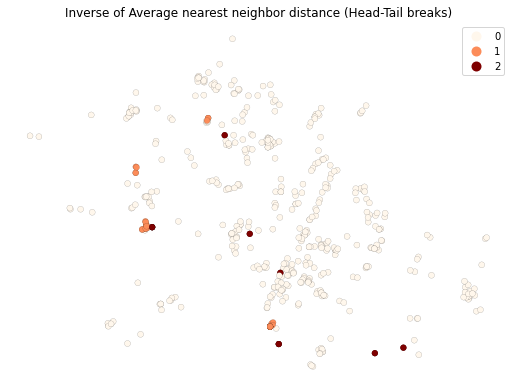

In [189]:
# ANN 역수를 HeadTailBreaks 방법으로 class를 나눈 후 단계구분도를 plot
data_alcohol=data_alcohol[data_alcohol['gid']!='Null']
hr10 = mc.HeadTailBreaks(data_alcohol['평균 nnd 역수'])
f, ax = plt.subplots(1, figsize=(9, 9))
data_alcohol.assign(cl=hr10.yb,).plot(column='cl', categorical=True,         k=10, cmap='OrRd', linewidth=0.1, ax=ax,         edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Inverse of Average nearest neighbor distance (Head-Tail breaks)") # 색이 진할 수록 평균거리가 작음
# plt.savefig(os.path.join(result_path, "Average nearest neighbor distance, Head-Tail breaks.png"))

## 최근린 지수와 클러스터링

In [29]:
# 데이터 개수
data_num=data_alcohol[data_alcohol['gid']!='Null'].shape[0]

# 수원 데이터들
data_suwon=data_alcohol[data_alcohol['gid']!='Null']

# 수원 데이터_클러스터링 용
data_suwon.rename(columns={'lat':'LAT', 'lon':'LON'}, inplace=True)
data_suwon_cluster=data_suwon[['LON', 'LAT']]

In [30]:
# 변수별 최근린 지수(NNI)
## 그리드 별로가 아니라 변수별!(변수 당 하나)
## 관측된 평균 최근린거리/기대되는 평균 최근린 거리
## 1을 기준으로 1보다 크면 분산된 데이터, 1보다 작을수록 군집된 데이터

# expected distance
## 0.5*sqr(면적/개수)
## 수원시 면적 121km^2
Ed=0.5*(120468723.7988332/data_num)**(1/2)

# average distance
Ad=pp.mean_nnd

NNI=Ad/Ed
NNI

0.4399007194850759

In [31]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

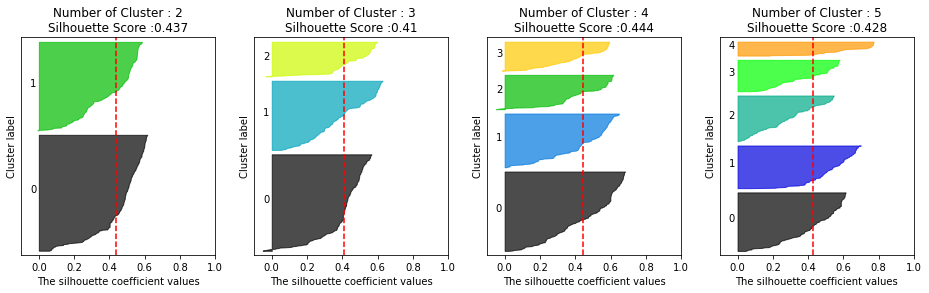

In [32]:
visualize_silhouette([ 2, 3, 4, 5], data_suwon_cluster) # 4개 할까나

In [140]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_suwon_cluster)  

# 결과 확인
result_by_sklearn = data_suwon_cluster.copy()
result_by_sklearn["cluster"] = kmeans.labels_
#result_by_sklearn['관할경찰서']=df['관할경찰서']
result_by_sklearn['gid']=data_suwon['gid']
result_by_sklearn['geometry']=data_suwon['geometry']
result_by_sklearn = gpd.GeoDataFrame(result_by_sklearn, geometry=result_by_sklearn.geometry)
result_by_sklearn

,LON,LAT,cluster,gid,geometry
0,126.964289,37.245329,2,다사52ab16ab,POINT (126.96429 37.24533)
1,127.013671,37.290940,0,다사56bb21ab,POINT (127.01367 37.29094)
2,127.034312,37.262510,3,다사58ba18ab,POINT (127.03431 37.26251)
3,127.044126,37.276376,1,다사59ba19bb,POINT (127.04413 37.27638)
4,126.974839,37.276931,2,다사53ab19bb,POINT (126.97484 37.27693)
...,...,...,...,...,...
4248,127.027992,37.296348,0,다사58aa22aa,POINT (127.02799 37.29635)
4249,127.020837,37.260137,3,다사57ba18aa,POINT (127.02084 37.26014)
4250,127.013970,37.244644,3,다사56bb16ab,POINT (127.01397 37.24464)
4251,127.014043,37.304775,0,다사56bb22bb,POINT (127.01404 37.30477)


In [152]:
def plot_geolocation_by_cluster(df, 
                                cluster=None, 
                                title=None, 
                                centers=None,
                                filename=None, size=8):
    '''
    Function to plot latitude and longitude coordinates
    #####################
    Args:
        df: pandas dataframe 
            Contains id, latitude, longitude, and color (optional).
        cluster: (optional) column (string) in df 
            Separate coordinates into different clusters
        title: (optional) string
        centers: (optional) array of coordinates for centers of each cluster
        filename: (optional) string  
    #####################
    Returns:
        Plot with lat/long coordinates 
    '''
    # Transform df into geodataframe
    geo_df = gpd.GeoDataFrame(df,
                           crs={'init': 'epsg:4326'},
                           geometry=[Point(xy) for xy in df.geometry])

    # Set figure size
    fig, ax = plt.subplots(figsize=(size,size))
    ax.set_aspect('equal')
    
    # Import NYC Neighborhood Shape Files
    nyc_full = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')
    nyc_full = gpd.GeoDataFrame(nyc_full, geometry=nyc_full.geometry)
    nyc_full.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', label=nyc_full['gid'], zorder=1)
    
    # Plot coordinates from geo_df on top of NYC map
    if cluster is not None:
        
        geo_df.plot(ax=ax, column=cluster, alpha=0.5, 
                    cmap='viridis', linewidth=0.8, zorder=2)
        
        if centers is not None:
            centers_gseries = gdp.GeoSeries(map(Point, zip(centers[:,1], centers[:,0])))
            centers_gseries.plot(ax=ax, alpha=1, marker='X', color='red', markersize=100, zorder=3)
        else:
            centroid=[]
            for i in range(df[cluster].max()+1):
                cl=df[df[cluster]==i][['LON', 'LAT']]
                centroid.append([cl['LON'].mean(), cl['LAT'].mean()])
            centers_gseries = gpd.GeoSeries(map(Point, centroid))
            centers_gseries.plot(ax=ax, alpha=1, marker='X', color='red', markersize=100, zorder=3)

        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        
        if filename is not None:
            fig.savefig(f'{filename}', bbox_inches='tight', dpi=300)
    else:
        geo_df.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        
    fig.clf()

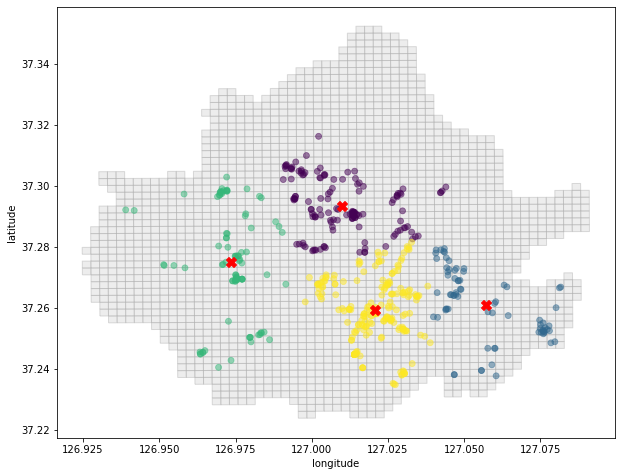

In [153]:
plot_geolocation_by_cluster(result_by_sklearn, cluster='cluster', title=None, centers=None, filename=None, size=10)

# 최근린 계층 군집

In [88]:
NNHC_df=result_by_sklearn[['LON','LAT','geometry']]

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(NNHC_df.drop(['geometry'], axis=1), method='complete', metric='euclidean')

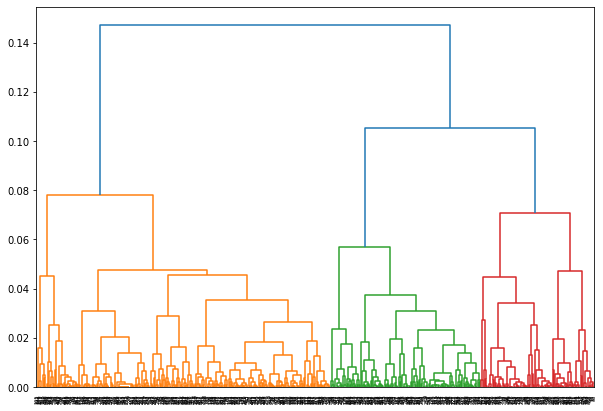

In [92]:
labelList = range(1, len(NNHC_df)+1)

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [190]:
def hc_sil(linked_data, df):
    from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기
    ndf=df.copy()
    cut=[0.05, 0.06, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08]
    for t in cut:
        cut_tree = fcluster(linked_data, t=t, criterion='distance')
        df['cluster'] = cut_tree
        sil_avg = silhouette_score(df[['LON','LAT']], cut_tree)
        plot_geolocation_by_cluster(NNHC_df, cluster='cluster', title="cut in "+str(t)+", silhouette is "+str(sil_avg), centers=None, filename=None, size=6)


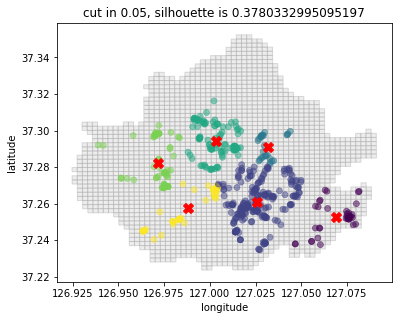

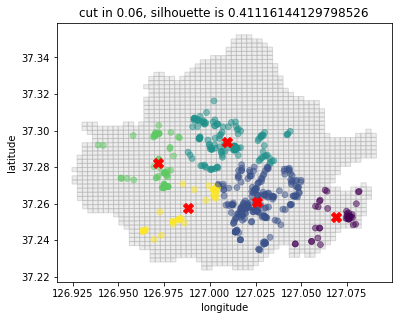

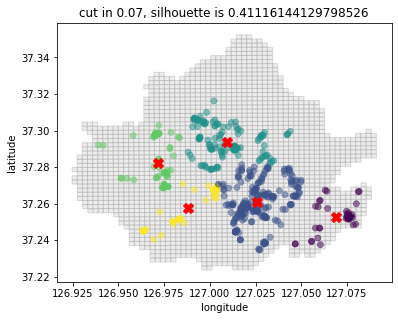

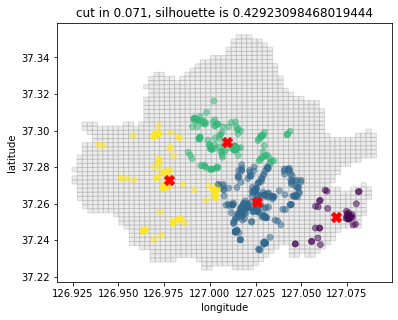

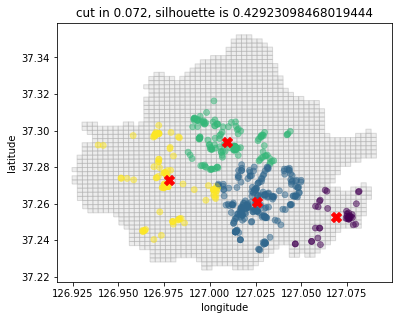

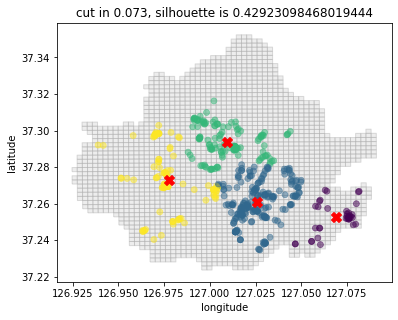

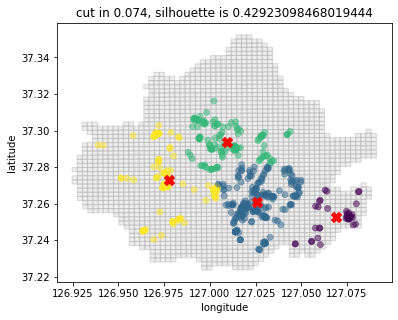

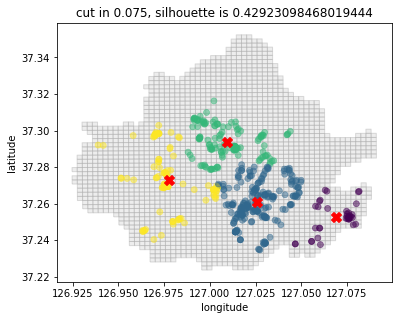

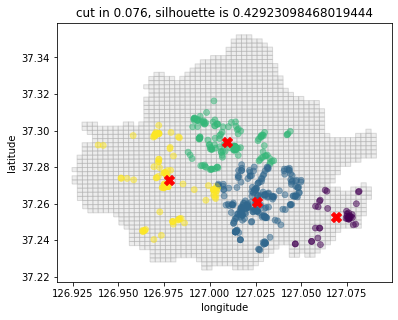

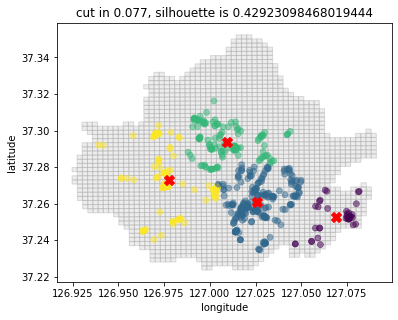

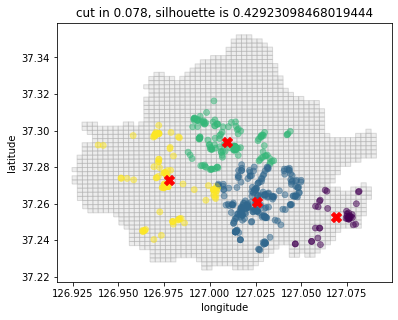

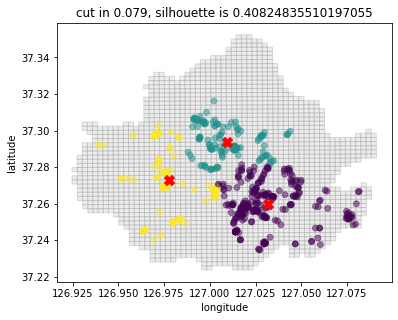

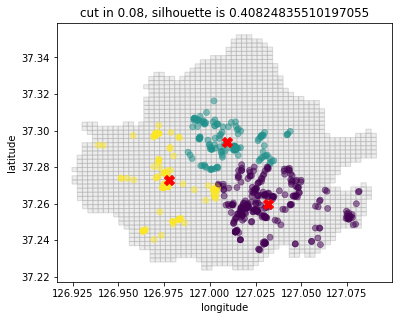

In [191]:
hc_sil(linked, NNHC_df)

In [186]:
def plot_geolocation_by_cluster_ellipse(df, 
                                cluster=None, 
                                title=None, 
                                centers=None,
                                filename=None, size=8):
    '''
    Function to plot latitude and longitude coordinates
    #####################
    Args:
        df: pandas dataframe 
            Contains id, latitude, longitude, and color (optional).
        cluster: (optional) column (string) in df 
            Separate coordinates into different clusters
        title: (optional) string
        centers: (optional) array of coordinates for centers of each cluster
        filename: (optional) string  
    #####################
    Returns:
        Plot with lat/long coordinates 
    '''
    # Transform df into geodataframe
    geo_df = gpd.GeoDataFrame(df,
                           crs={'init': 'epsg:4326'},
                           geometry=[Point(xy) for xy in df.geometry])

    # Set figure size
    fig, ax = plt.subplots(figsize=(size,size))
    ax.set_aspect('equal')
    
    # Import NYC Neighborhood Shape Files
    nyc_full = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')
    nyc_full = gpd.GeoDataFrame(nyc_full, geometry=nyc_full.geometry)
    nyc_full.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', label=nyc_full['gid'], zorder=1)
    
    # Plot coordinates from geo_df on top of NYC map
    if cluster is not None:
        
        geo_df.plot(ax=ax, column=cluster, alpha=0.5, 
                    cmap='viridis', linewidth=0.8, zorder=2)
        
        if centers is not None:
            centers_gseries = gdp.GeoSeries(map(Point, zip(centers[:,1], centers[:,0])))
            centers_gseries.plot(ax=ax, alpha=1, marker='X', color='red', markersize=100, zorder=3)
        else:
            centroid=[]
            for i in range(df[cluster].max()+1):
                cl=df[df[cluster]==i][['LON', 'LAT']]
                centroid.append([cl['LON'].mean(), cl['LAT'].mean()])
            centers_gseries = gpd.GeoSeries(map(Point, centroid))
            centers_gseries.plot(ax=ax, alpha=1, marker='X', color='red', markersize=100, zorder=3)
            
            
        ellipse = Ellipse((result_by_sklearn.loc[0,'LON'], result_by_sklearn.loc[0,'LAT']), 10,20, 30) 
        vertices = ellipse.get_verts()     # get the vertices from the ellipse object
        ellipse = Polygon(vertices)        # Turn it into a polygon
        
        polys2 = gpd.GeoSeries([ellipse])
        df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1]})
        df2.plot(ax=ax, color='green', alpha=0.5);
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        

        
        if filename is not None:
            fig.savefig(f'{filename}', bbox_inches='tight', dpi=300)
    else:
        geo_df.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.show()
        
    fig.clf()

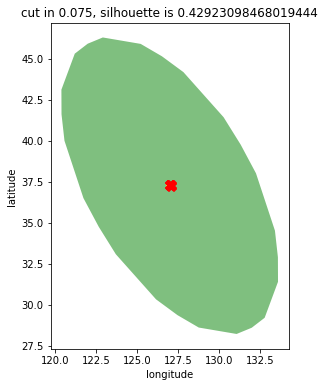

In [187]:
from matplotlib.patches import Ellipse
from shapely.geometry import Polygon 

t=0.075
cut_tree = fcluster(linked, t=t, criterion='distance')
NNHC_df['cluster'] = cut_tree
sil_avg = silhouette_score(NNHC_df[['LON','LAT']], cut_tree)
plot_geolocation_by_cluster_ellipse(NNHC_df, cluster='cluster', title="cut in "+str(t)+", silhouette is "+str(sil_avg), centers=None, filename=None, size=6)